In [11]:
sentence = "Her cat's name is Luna"
print(sentence)

Her cat's name is Luna


In [12]:
sentence.lower()

"her cat's name is luna"

In [13]:
sentence_list = ["His cat name starts with Z", "Don't Come for Class late", "I like to watch Documentries"]
sentence_list

['His cat name starts with Z',
 "Don't Come for Class late",
 'I like to watch Documentries']

In [14]:
[x.lower() for x in sentence_list]

['his cat name starts with z',
 "don't come for class late",
 'i like to watch documentries']

Stopwords are the words in the language which don't carry much meaning e.g. "and", "of", "a", "to"
We remove these words because it removes a lot of complexity from the data. 

In [15]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Jamal
[nltk_data]     Arshad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
from nltk.corpus import stopwords
en_stopwords = stopwords.words('english')
en_stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [17]:
sentence = "It was too far to go to the Layers and he did not want her to go"
sentence_no_stopwords = ' '.join(word for word in sentence.split() if word not in (en_stopwords))
sentence_no_stopwords

'It far go Layers want go'

In [18]:
en_stopwords.remove('did')
en_stopwords.remove('not')
sentence = "It was too far to go to the Layers and he did not want her to go"
sentence_no_stopwords = ' '.join(word for word in sentence.split() if word not in (en_stopwords))
sentence_no_stopwords

'It far go Layers did not want go'

In [19]:
en_stopwords.append('go')
sentence = "It was too far to go to the Layers and he did not want her to go"
sentence_no_stopwords = ' '.join(word for word in sentence.split() if word not in (en_stopwords))
sentence_no_stopwords

'It far Layers did not want'

In [20]:
# Regular Expressions

import re

In [21]:
my_folder = r"C:\desktop\notes" # if we remove r from the start of the string it will consider \n as new line escape sequence 
print(my_folder)

C:\desktop\notes


In [22]:
# re.search()

result_search = re.search("pattern", r"string containing the pattern")
result_search

<re.Match object; span=(22, 29), match='pattern'>

In [23]:
print(result_search.group())

pattern


In [24]:
result_search = re.search("pattern", r"string containing the nothing")
print(result_search)

None


In [25]:
# re.sub
string = r"sara was able to help me find the items i needed quickly"
re.sub('sara', 'Sara', string)

'Sara was able to help me find the items i needed quickly'

In [26]:
customer_reviews = ['sam was a great help to me in the store', 'the cashier was very rude to me, I think her name was eleanor', 'amazing work from sadeen!', 'sarah was able to help me find the items i needed quickly', 'lucy is such a great addition to the team', 'great service from sara she me what i wanted']
customer_reviews

['sam was a great help to me in the store',
 'the cashier was very rude to me, I think her name was eleanor',
 'amazing work from sadeen!',
 'sarah was able to help me find the items i needed quickly',
 'lucy is such a great addition to the team',
 'great service from sara she me what i wanted']

In [27]:
for x in customer_reviews:
    if 'sara' in x.lower():
        print(x)

sarah was able to help me find the items i needed quickly
great service from sara she me what i wanted


In [28]:
sara_reviews = [x for x in customer_reviews if 'sara' in x.lower()] # [Expression  For_loop  Conditions]
sara_reviews

['sarah was able to help me find the items i needed quickly',
 'great service from sara she me what i wanted']

In [29]:
def search_reviews(pattern):
    my_list = []
    for string in customer_reviews:
        if(re.search(pattern, string)):
            my_list.append(string)
    return my_list

In [30]:
# find sarah's reviews from the reviews list using regex

pattern_to_find = r"sarah? "
search_reviews(pattern_to_find)

['sarah was able to help me find the items i needed quickly',
 'great service from sara she me what i wanted']

In [31]:
# Find reviews that with letter a

pattern_to_find = r"^a"
search_reviews(pattern_to_find)


['amazing work from sadeen!']

In [32]:
# Find reviews that end with letter y

pattern_to_find = 'y$'
search_reviews(pattern_to_find)

['sarah was able to help me find the items i needed quickly']

In [33]:
# Find reviews that contain the words needed or wanted

pattern_to_find = r"(need|want)ed"
search_reviews(pattern_to_find)

['sarah was able to help me find the items i needed quickly',
 'great service from sara she me what i wanted']

In [34]:
# Remove anything from the review that isn't a word or a space (i.e remove punctuation)

no_puntuations = []
pattern_to_find = r"^\w\s"
for string in customer_reviews:
    temp_string = re.sub(pattern_to_find, "", string)
    no_puntuations.append(temp_string)
no_puntuations

['sam was a great help to me in the store',
 'the cashier was very rude to me, I think her name was eleanor',
 'amazing work from sadeen!',
 'sarah was able to help me find the items i needed quickly',
 'lucy is such a great addition to the team',
 'great service from sara she me what i wanted']

In [35]:
# Tokenization

nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package punkt_tab to C:\Users\Jamal
[nltk_data]     Arshad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [36]:
sentence = "His dog name is Tommy. He likes to eat a ton of dog food."
sent_tokenize(sentence)

['His dog name is Tommy.', 'He likes to eat a ton of dog food.']

In [37]:
sentence = "His dog name is Tommy. He likes to eat a ton of dog food."
word_tokenize(sentence)

['His',
 'dog',
 'name',
 'is',
 'Tommy',
 '.',
 'He',
 'likes',
 'to',
 'eat',
 'a',
 'ton',
 'of',
 'dog',
 'food',
 '.']

In [38]:
# Stemming 

from nltk.stem import PorterStemmer
ps = PorterStemmer()
connect_tokens = ['connecting', 'connected', 'connectivity', 'connection', 'connect', 'connects']
for word in connect_tokens:
    print(word, " : ", ps.stem(word))

connecting  :  connect
connected  :  connect
connectivity  :  connect
connection  :  connect
connect  :  connect
connects  :  connect


In [39]:
learn_tokens = ['learning', "learns", 'learned', 'Learn']
for word in learn_tokens:
    print(word, " : ", ps.stem(word))

learning  :  learn
learns  :  learn
learned  :  learn
Learn  :  learn


In [40]:
# Lemmatization
# Where Stemming removes the last few characters of a word, lemmatization  stems  the word to a more meaningful  base form and ensures it does not lose its meaning. Lemmatization works more intelligently, referencing a predefined dictionary containing the context  of words and uses this when diminishing the word to the base form. 

connect_tokens = ['connecting', 'connected', 'connectivity', 'connection', 'connect', 'connects']
learn_tokens = ['learning', "learns", 'learned', 'Learn', 'learners']
likes_tokens = ['likes', 'better', 'worse']

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to C:\Users\Jamal
[nltk_data]     Arshad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [41]:
for word in likes_tokens:
    print(word, " : ", wnl.lemmatize(word))

likes  :  like
better  :  better
worse  :  worse


In [42]:
# Libs

import nltk
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [43]:
# N-grams
# We can break out text  down into n-grams to check our preprocessing, explore the contents of our data, or create new features  for machine laerning. An n-gram is simply a sequence of neighbouring n words (or tokens), where n can be any number.  

tokens = [
    'the', 'rise', 'of', 'artificial', 'intelligence', 'has', 'led', 'to', 
    'significant', 'advancements', 'in', 'natural', 'language', 'processing', 
    'computer', 'vision', 'and', 'other', 'fields', 'machine', 'learning', 
    'algorithms', 'are', 'becoming', 'more', 'sophisticated', 'enabling', 
    'computers', 'to', 'perform', 'complex', 'tasks', 'that', 'were', 'once', 
    'thought', 'to', 'be', 'the', 'exclusive', 'domain', 'of', 'humans', 
    'with', 'the', 'advent', 'of', 'deep', 'learning', 'neural', 'networks', 
    'have', 'become', 'even', 'more', 'powerful', 'capable', 'of', 
    'processing', 'vast', 'amounts', 'of', 'data', 'and', 'learning', 'from', 
    'it', 'in', 'ways', 'that', 'were', 'not', 'possible', 'before', 'as', 'a', 
    'result', 'ai', 'is', 'increasingly', 'being', 'used', 'in', 'a', 'wide', 
    'range', 'of', 'industries', 'from', 'healthcare', 'to', 'finance', 'to', 
    'transportation', 'and', 'its', 'impact', 'is', 'only', 'set', 'to', 'grow', 
    'in', 'the', 'years', 'to', 'come'
]

In [44]:
# Uni-Gram: n=1
unigrams = (pd.Series(nltk.ngrams(tokens, 1)).value_counts())
print(unigrams)

(to,)          7
(of,)          6
(the,)         4
(in,)          4
(learning,)    3
              ..
(humans,)      1
(rise,)        1
(advent,)      1
(deep,)        1
(come,)        1
Name: count, Length: 79, dtype: int64


Text(0, 0.5, 'Unigram')

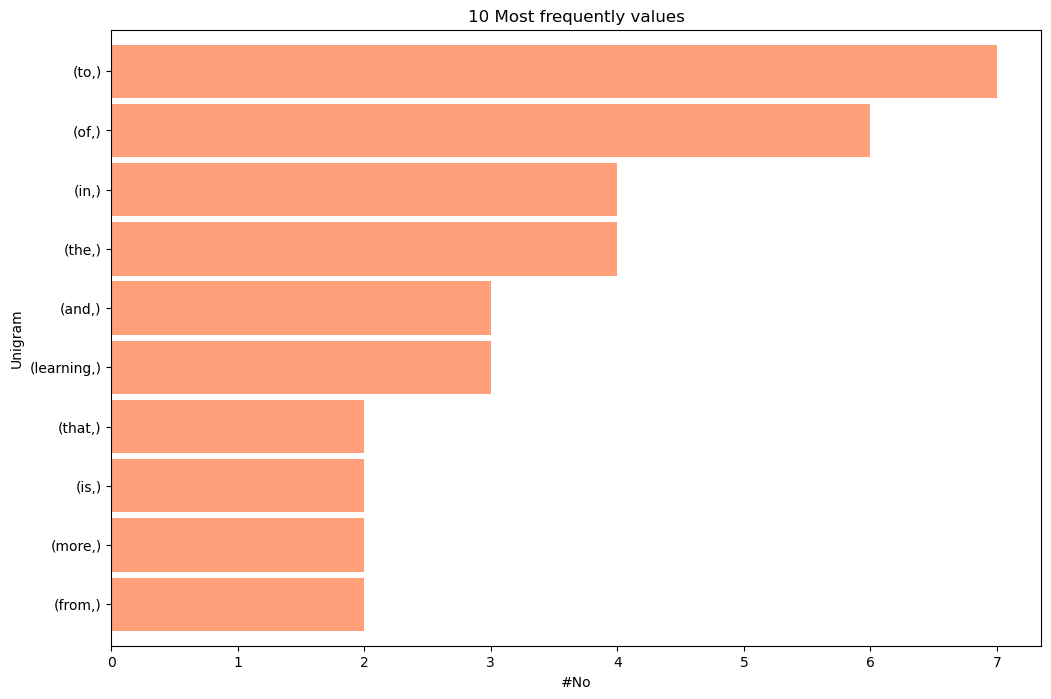

In [45]:
unigrams[0:10].sort_values().plot.barh(color='lightsalmon', width=0.9, figsize=(12,8))
plt.title("10 Most frequently values")
plt.xlabel("#No")
plt.ylabel('Unigram')

In [46]:
# Bi-Gram: n=2
bigrams = (pd.Series(nltk.ngrams(tokens, 2)).value_counts())
print(bigrams)

(that, were)             2
(the, rise)              1
(increasingly, being)    1
(ai, is)                 1
(result, ai)             1
                        ..
(tasks, that)            1
(complex, tasks)         1
(perform, complex)       1
(to, perform)            1
(to, come)               1
Name: count, Length: 105, dtype: int64


Text(0, 0.5, 'Bigram')

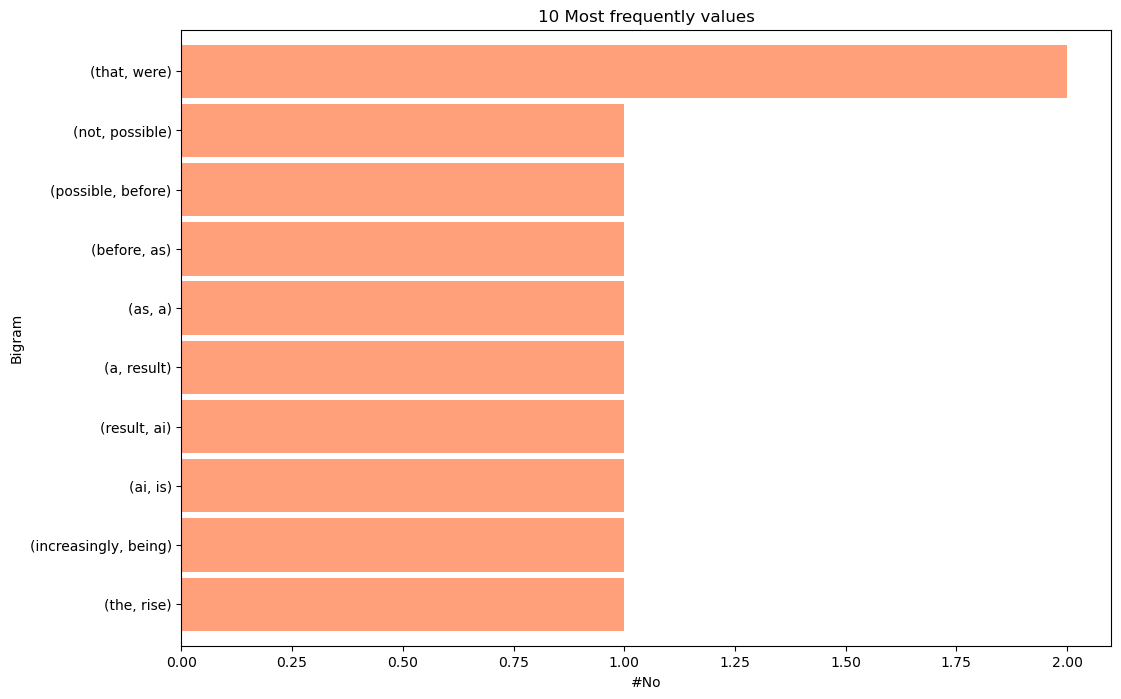

In [47]:
bigrams[0:10].sort_values().plot.barh(color='lightsalmon', width=0.9, figsize=(12,8))
plt.title("10 Most frequently values")
plt.xlabel("#No")
plt.ylabel('Bigram')

In [48]:
# Tri-Gram: n=2
trigrams = (pd.Series(nltk.ngrams(tokens, 3)).value_counts())
print(trigrams)

(the, rise, of)              1
(even, more, powerful)       1
(ai, is, increasingly)       1
(result, ai, is)             1
(a, result, ai)              1
                            ..
(that, were, once)           1
(tasks, that, were)          1
(complex, tasks, that)       1
(perform, complex, tasks)    1
(years, to, come)            1
Name: count, Length: 105, dtype: int64


Text(0, 0.5, 'Trigram')

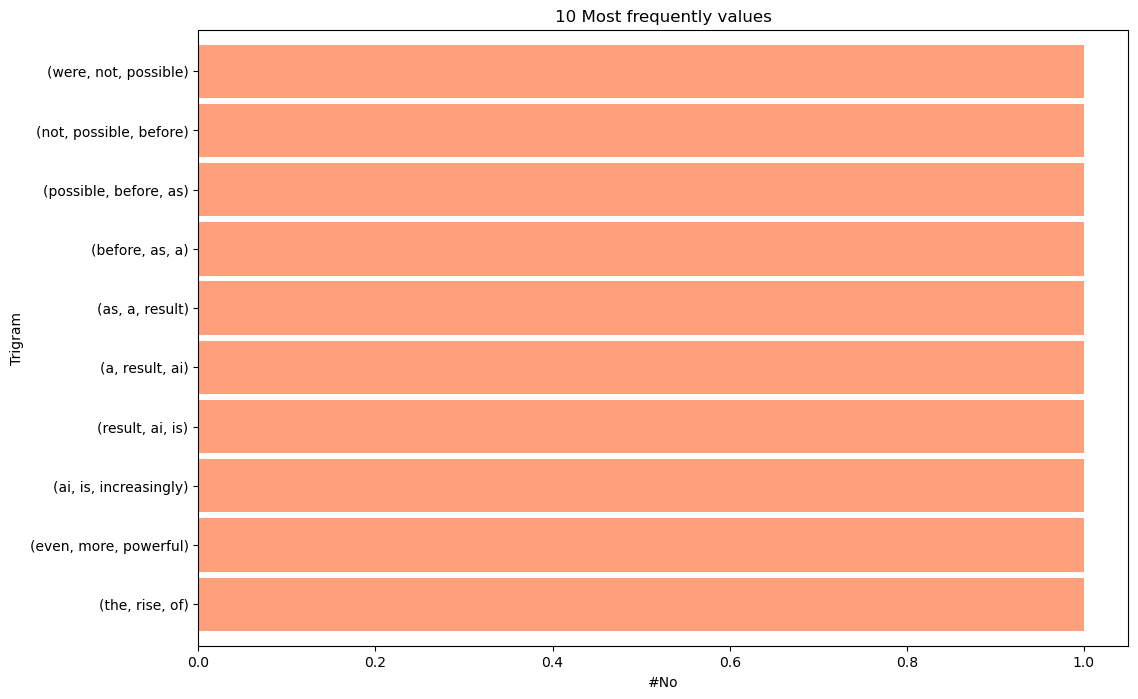

In [49]:
trigrams[0:10].sort_values().plot.barh(color='lightsalmon', width=0.9, figsize=(12,8))
plt.title("10 Most frequently values")
plt.xlabel("#No")
plt.ylabel('Trigram')